Columns in [NON-OCCU] DEMOGRAPHIC:
Index(['Age', 'Kasarian', 'Lungsod/Rehiyon ng Paninirahan',
       'Educational Attainment', 'Monthly Income', 'Training in Riding',
       'No. of Days in Training', 'Years of Having License',
       'Ilang oras kang bumabyahe gamit ang motorsiklo? (hours)',
       'No. of Working Hours',
       'Nagmamaneho ka rin ba ng ibang uri ng sasakyan? (Lagyan ng check lahat ng naaangkop)',
       'Traffic Violation', 'Accident in Motorcycle'],
      dtype='object')

Columns in [OCCU] DEMOGRAPHIC:
Index(['Age', 'Kasarian', 'Lungsod/Rehiyon ng Paninirahan',
       'Educational Attainment', 'Monthly Income',
       'Layunin ng Paggamit ng Motorsiklo', 'Company Affiliated',
       'Uri ng Trabaho', 'Training in Riding', 'No. of Days in Training',
       'Years of Having License', 'No. of Working Hours', 'Years as a Rider',
       'Ilang taon ka nang nagmamaneho sa kompanyang kasalukuyan mong pinagtratrabuhan?',
       'Drives other types of vehicles', 'Traffic V

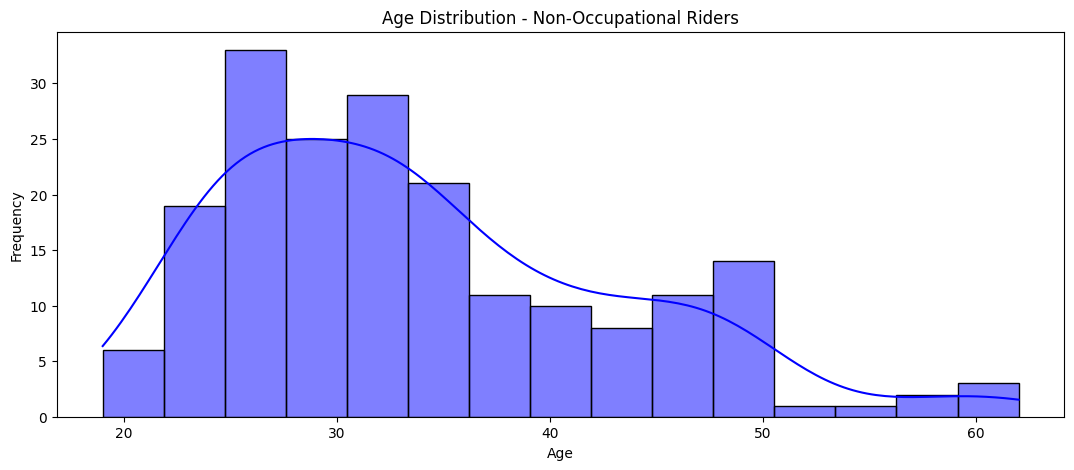

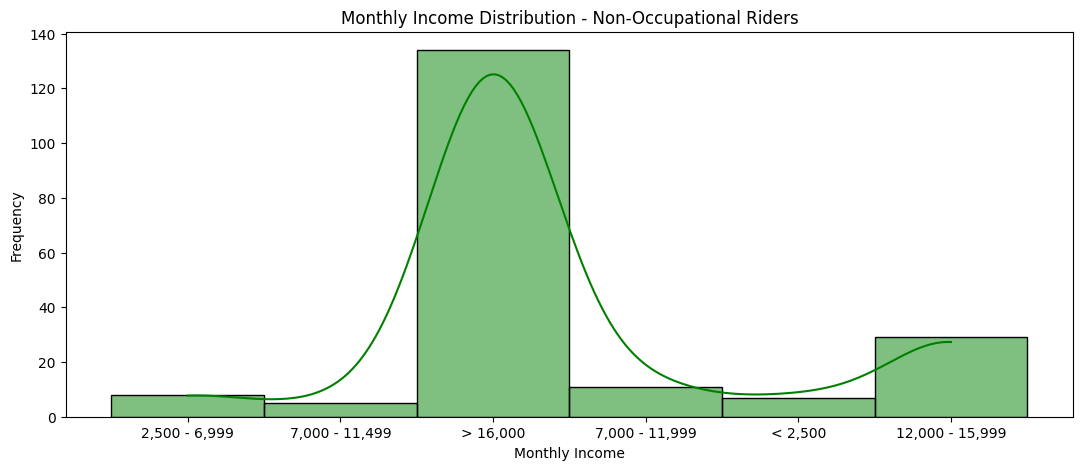

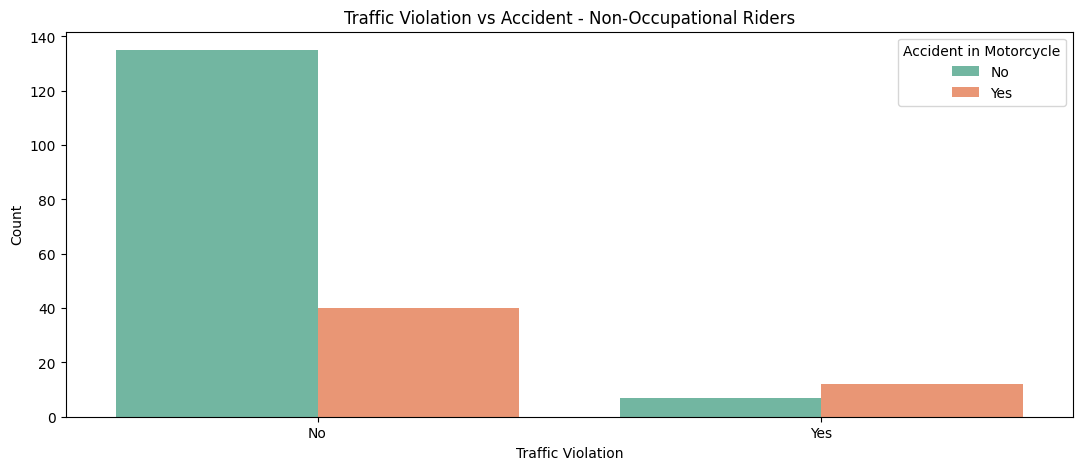


Generating visualizations for Occupational Riders...


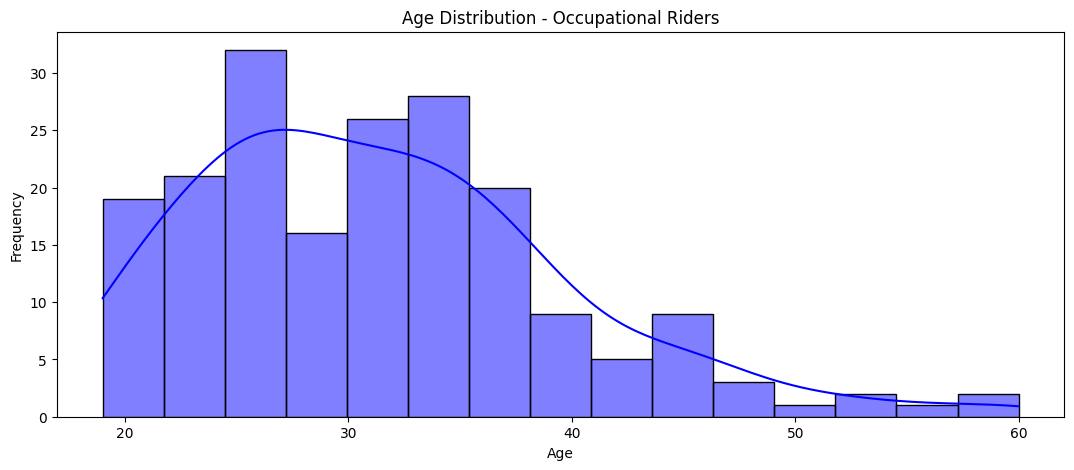

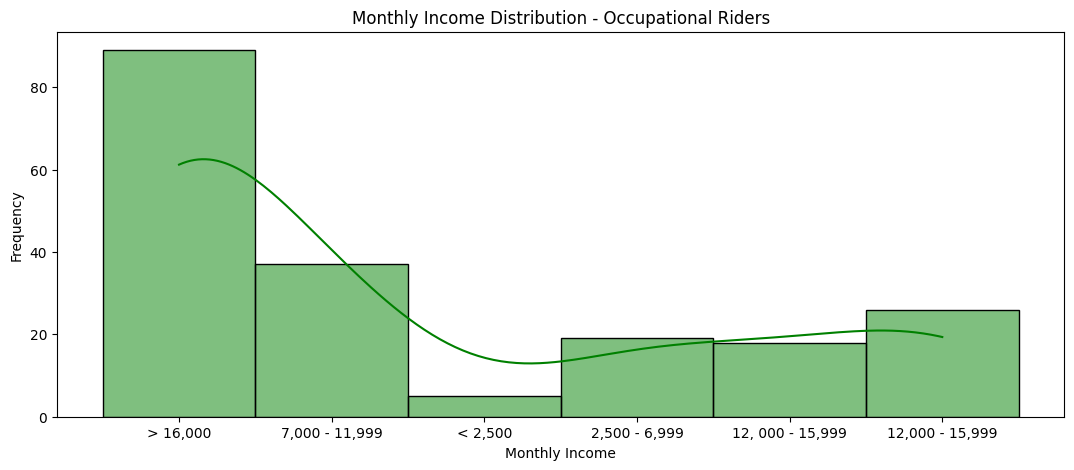

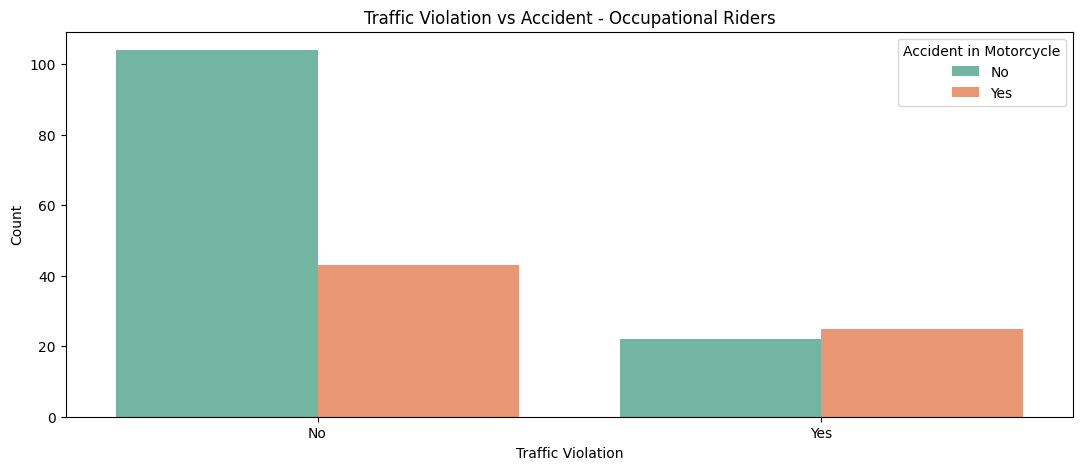


=== Correlation Matrix for Non-Occupational Riders ===
                           Age  Years of Having License
Age                      1.000                    0.623
Years of Having License  0.623                    1.000


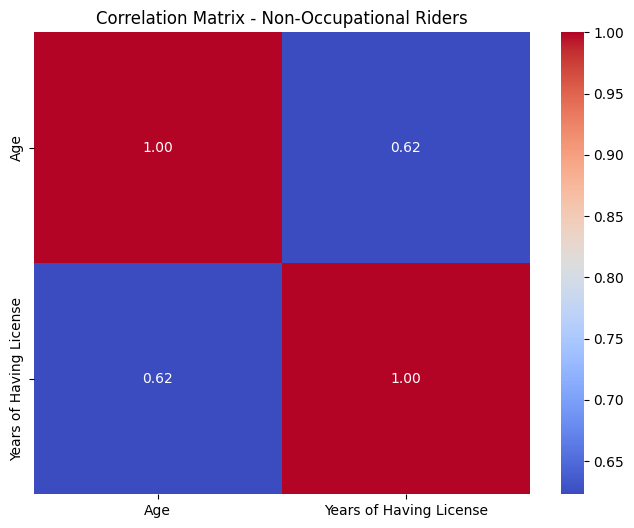


=== Correlation Matrix for Occupational Riders ===
                           Age  Years of Having License  Years as a Rider
Age                      1.000                    0.671             0.226
Years of Having License  0.671                    1.000             0.374
Years as a Rider         0.226                    0.374             1.000


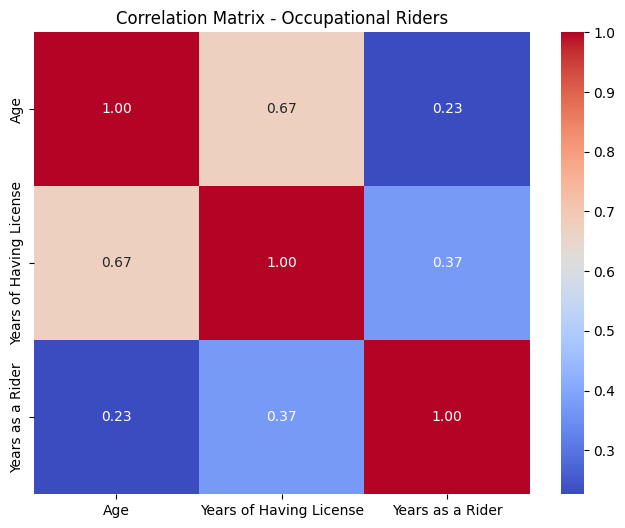

     Age                             Educational Attainment  Monthly Income  \
0     22        Senior High School Education (Grades 11-12)   2,500 - 6,999   
1     29  College/Undergraduate Education (Bachelor's De...  7,000 - 11,499   
2     41         Junior High School Education (Grades 7-10)   2,500 - 6,999   
3     32  College/Undergraduate Education (Bachelor's De...        > 16,000   
4     42  College/Undergraduate Education (Bachelor's De...        > 16,000   
..   ...                                                ...             ...   
189   35  College/Undergraduate Education (Bachelor's De...        > 16,000   
190   49  Technical-Vocational Education (TESDA Programs...        > 16,000   
191   28  College/Undergraduate Education (Bachelor's De...        > 16,000   
192   25  College/Undergraduate Education (Bachelor's De...        > 16,000   
193   47  College/Undergraduate Education (Bachelor's De...        > 16,000   

    Training in Riding  Years of Having License Tra

TypeError: could not convert string to float: 'No'

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Load Excel file ===
file_path = "file.xlsx"  # Replace with your actual path
non_occu_data = pd.read_excel(file_path, sheet_name="NON-OCCU DEMOGRAPHIC")
occu_data = pd.read_excel(file_path, sheet_name="OCCU DEMOGRAPHIC")

# === Preview column names ===
print("Columns in [NON-OCCU] DEMOGRAPHIC:")
print(non_occu_data.columns)
print("\nColumns in [OCCU] DEMOGRAPHIC:")
print(occu_data.columns)

# === Define actual column names based on Excel headers (adjust as needed after viewing) ===
non_occu_features = [
    'Age',
    'Educational Attainment',
    'Monthly Income',
    'Training in Riding',
    'Years of Having License',
    'Traffic Violation',
    'Accident in Motorcycle'
]

occu_features = [
    'Age',
    'Educational Attainment',
    'Monthly Income',
    'Training in Riding',
    'Years of Having License',
    'Years as a Rider',
    'Traffic Violation',
    'Accident in Motorcycle'
]

# === Select relevant columns ===
non_occu_df = non_occu_data[non_occu_features]
occu_df = occu_data[occu_features]

# === Summary statistics ===
def summarize_data(df, label):
    print(f"\n=== Summary for {label} ===")
    print(df.describe(include='all'))
    print("\n")

summarize_data(non_occu_df, "Non-Occupational Riders")
summarize_data(occu_df, "Occupational Riders")

# === Visualizations ===
def visualize_data(df, label):
    print(f"\nGenerating visualizations for {label}...")

    # Age Distribution
    plt.figure(figsize=(13, 5))
    sns.histplot(df['Age'].dropna(), kde=True, bins=15, color='blue')
    plt.title(f"Age Distribution - {label}")
    plt.xlabel("Age")
    plt.ylabel("Frequency")
    plt.show()

    # Monthly Income Distribution
    plt.figure(figsize=(13, 5))
    sns.histplot(df['Monthly Income'].dropna(), kde=True, bins=15, color='green')
    plt.title(f"Monthly Income Distribution - {label}")
    plt.xlabel("Monthly Income")
    plt.ylabel("Frequency")
    plt.show()

    # Traffic Violations vs Accident
    plt.figure(figsize=(13, 5))
    sns.countplot(data=df, x='Traffic Violation', hue='Accident in Motorcycle', palette='Set2')
    plt.title(f"Traffic Violation vs Accident - {label}")
    plt.xlabel("Traffic Violation")
    plt.ylabel("Count")
    plt.legend(title="Accident in Motorcycle")
    plt.show()

visualize_data(non_occu_df, "Non-Occupational Riders")
visualize_data(occu_df, "Occupational Riders")

# === Correlation for numeric columns ===
def correlation_analysis(df, label):
    numeric_df = df.select_dtypes(include=['float64', 'int64'])
    if not numeric_df.empty:
        corr = numeric_df.corr()

        # Print correlation matrix as text
        print(f"\n=== Correlation Matrix for {label} ===")
        print(corr.round(3))  # rounded for readability

        # Optional: save to CSV
        # corr.to_csv(f"{label}_correlation_matrix.csv")

        # Plot heatmap
        plt.figure(figsize=(8, 6))
        sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
        plt.title(f"Correlation Matrix - {label}")
        plt.show()
    else:
        print(f"No numeric data to correlate for {label}")


correlation_analysis(non_occu_df, "Non-Occupational Riders")
correlation_analysis(occu_df, "Occupational Riders")
print(non_occu_df)
print(occu_df)

print("\n✅ Analysis complete. Please review the output above.")


accident_series = occu_df['Accident in Motorcycle'].dropna()

print("📊 Descriptive Statistics for Accident in Motorcycle (Count Data):")
print(accident_series.describe())
print("\nMode:", accident_series.mode().values)
print("Skewness:", accident_series.skew())
print("Kurtosis:", accident_series.kurtosis())



Columns available:
Index(['Age', 'Kasarian', 'Lungsod/Rehiyon ng Paninirahan',
       'Educational Attainment', 'Monthly Income',
       'Layunin ng Paggamit ng Motorsiklo', 'Company Affiliated',
       'Uri ng Trabaho', 'Training in Riding', 'No. of Days in Training',
       'Years of Having License', 'No. of Working Hours', 'Years as a Rider',
       'Ilang taon ka nang nagmamaneho sa kompanyang kasalukuyan mong pinagtratrabuhan?',
       'Drives other types of vehicles', 'Traffic Violation',
       'Accident in Motorcycle'],
      dtype='object')

🔍 Chi-square Test: Traffic Violation vs Accident in Motorcycle
Chi2 Statistic: 7.945
Degrees of Freedom: 1
p-value: 0.0048
🔴 Significant association (p < 0.05)

🔍 Chi-square Test: Educational Attainment vs Accident in Motorcycle
Chi2 Statistic: 3.005
Degrees of Freedom: 6
p-value: 0.8083
🟢 No significant association (p >= 0.05)

🔍 Chi-square Test: Training in Riding vs Accident in Motorcycle
Chi2 Statistic: 0.103
Degrees of Freedom: 1
p-va

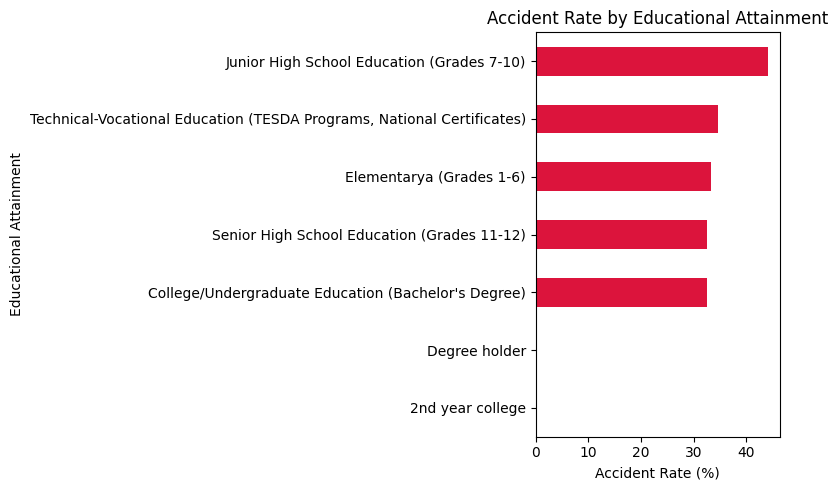


📊 Accident rate by Educational Attainment


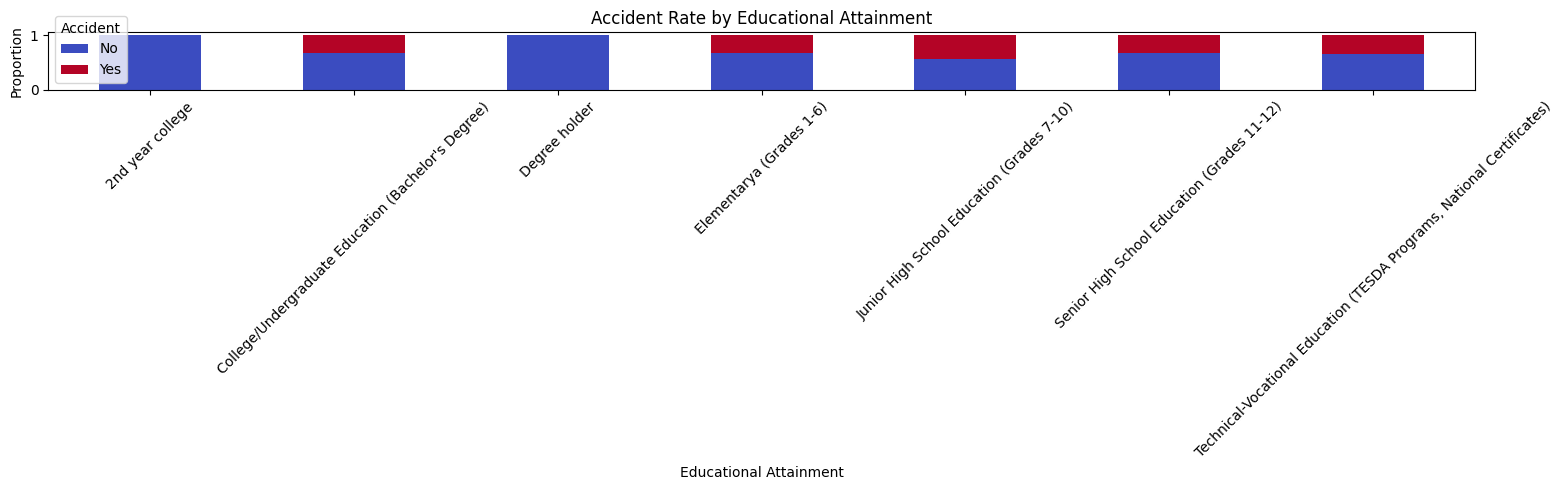


📊 Accident rate by Training in Riding


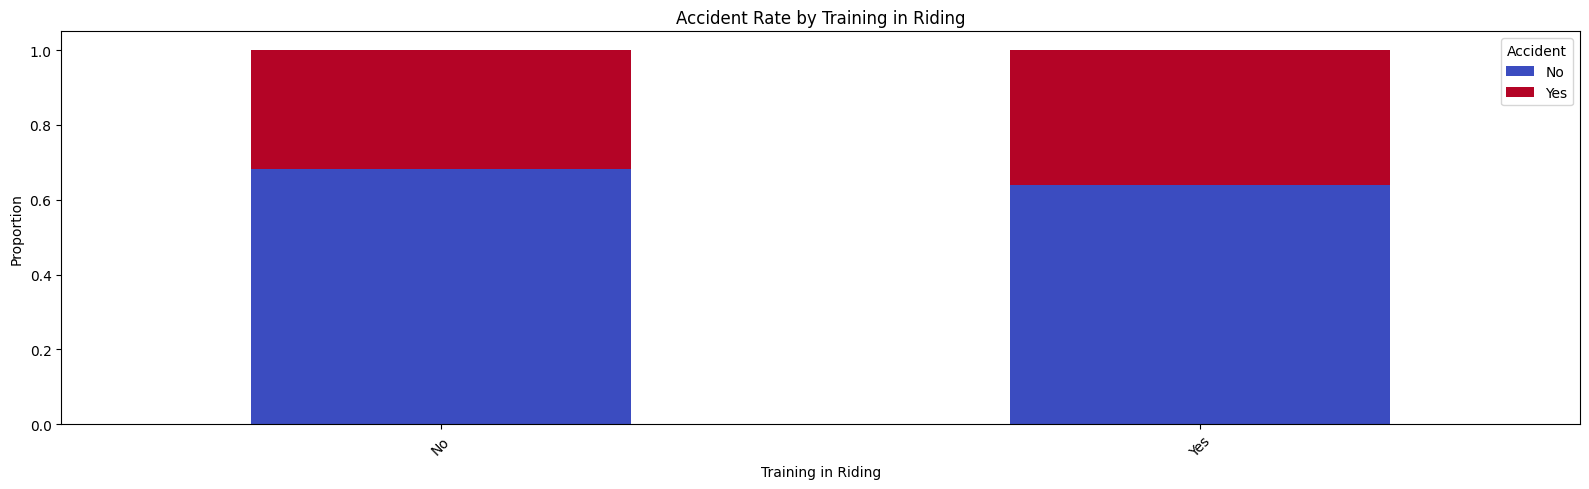


📊 Accident rate by Traffic Violation


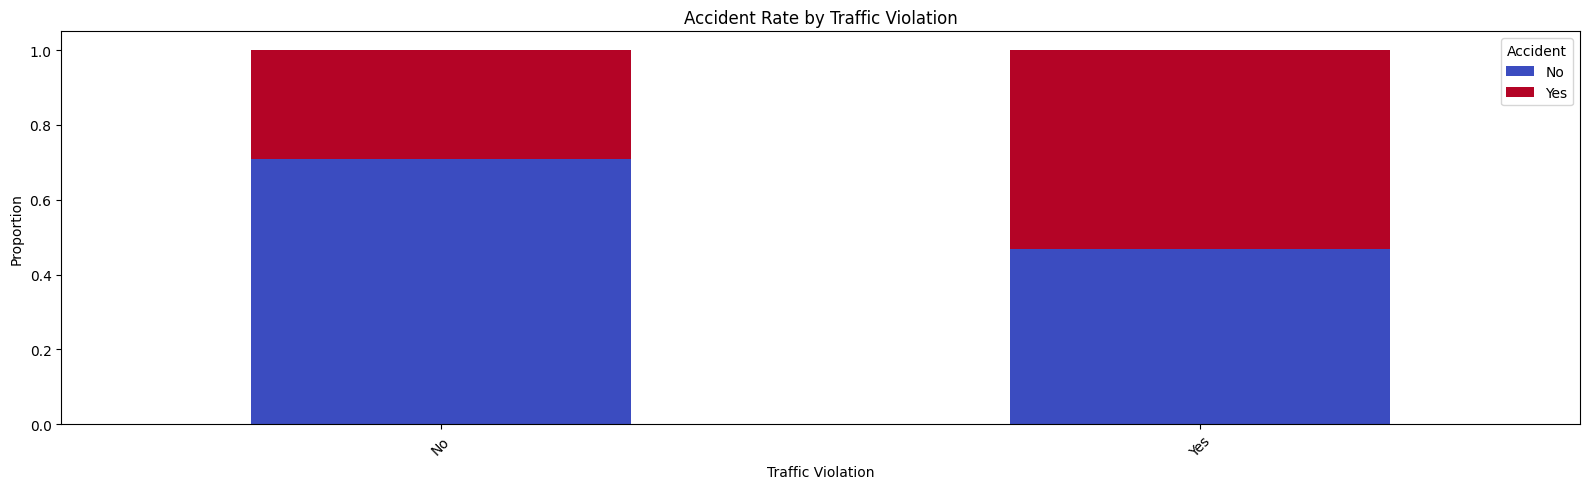

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# === Load data ===
file_path = "file.xlsx"  # Replace with your actual file path
occu_df = pd.read_excel(file_path, sheet_name="OCCU DEMOGRAPHIC")

# === Show column names for reference ===
print("Columns available:")
print(occu_df.columns)

# === Chi-square Test Function ===
def chi_square_test(df, var1, var2):
    print(f"\n🔍 Chi-square Test: {var1} vs {var2}")
    table = pd.crosstab(df[var1], df[var2])
    chi2, p, dof, expected = chi2_contingency(table)
    print("Chi2 Statistic:", round(chi2, 3))
    print("Degrees of Freedom:", dof)
    print("p-value:", round(p, 4))
    if p < 0.05:
        print("🔴 Significant association (p < 0.05)")
    else:
        print("🟢 No significant association (p >= 0.05)")

# Run Chi-square Tests
chi_square_test(occu_df, 'Traffic Violation', 'Accident in Motorcycle')
chi_square_test(occu_df, 'Educational Attainment', 'Accident in Motorcycle')
chi_square_test(occu_df, 'Training in Riding', 'Accident in Motorcycle')

def show_accident_rate_by_education(df):
    print("\n📊 Accident Rate by Educational Attainment:\n")
    rate_data = df[['Educational Attainment', 'Accident in Motorcycle']].dropna()

    # Create frequency table
    summary = (
        rate_data.groupby('Educational Attainment')['Accident in Motorcycle']
        .value_counts(normalize=True)
        .unstack()
        .fillna(0)
    )

    # Convert column names to string to avoid AttributeError
    summary.columns = summary.columns.astype(str)

    # Try to identify the 'Accident' column (could be 'Yes', '1', 'True', etc.)
    accident_col = [col for col in summary.columns if col.lower() in ['yes', '1', 'true'] or 'accident' in col.lower()]
    if accident_col:
        summary['Accident Rate (%)'] = summary[accident_col[0]] * 100
    else:
        print("⚠️ Could not detect accident column. Please check the column values manually.")
        print("Columns found:", summary.columns)
        return

    summary['Total Riders'] = rate_data['Educational Attainment'].value_counts()
    print(summary[['Accident Rate (%)', 'Total Riders']].sort_values('Accident Rate (%)', ascending=False))


# Call function
show_accident_rate_by_education(occu_df)

def plot_accident_rate_by_education(df):
    data = df[['Educational Attainment', 'Accident in Motorcycle']].dropna()
    rate_df = (
        data.groupby('Educational Attainment')['Accident in Motorcycle']
        .value_counts(normalize=True)
        .unstack()
        .fillna(0)
    )

    # Ensure columns are strings
    rate_df.columns = rate_df.columns.astype(str)

    # Detect accident column name
    accident_col = [col for col in rate_df.columns if col.lower() in ['yes', '1', 'true'] or 'accident' in col.lower()]
    if accident_col:
        rate_df['Accident Rate (%)'] = rate_df[accident_col[0]] * 100
    else:
        print("⚠️ Accident column not found for plotting.")
        print("Columns available:", rate_df.columns)
        return

    # Plot
    rate_df['Accident Rate (%)'].sort_values(ascending=True).plot(
        kind='barh', color='crimson', figsize=(8, 5)
    )
    plt.title("Accident Rate by Educational Attainment")
    plt.xlabel("Accident Rate (%)")
    plt.tight_layout()
    plt.show()
show_accident_rate_by_education(occu_df)
plot_accident_rate_by_education(occu_df)


# === Bar Plot: Accident Rate by Group ===
def plot_accident_rate_by_group(df, group_col):
    print(f"\n📊 Accident rate by {group_col}")
    plot_data = df[[group_col, 'Accident in Motorcycle']].dropna()
    summary = (
        plot_data.groupby(group_col)['Accident in Motorcycle']
        .value_counts(normalize=True)
        .unstack()
        .fillna(0)
    )
    summary.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(16, 5))
    plt.title(f"Accident Rate by {group_col}")
    plt.ylabel("Proportion")
    plt.xlabel(group_col)
    plt.xticks(rotation=45)
    plt.legend(title="Accident")
    plt.tight_layout()
    plt.show()

# Run Bar Plots
plot_accident_rate_by_group(occu_df, 'Educational Attainment')
plot_accident_rate_by_group(occu_df, 'Training in Riding')
plot_accident_rate_by_group(occu_df, 'Traffic Violation')


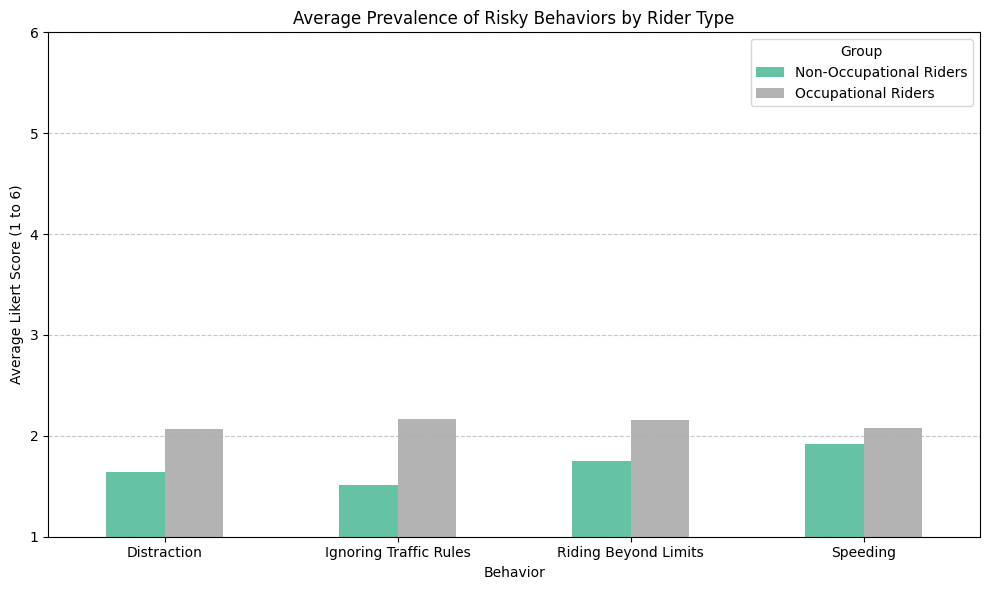


📊 Detailed Risk Behavior Statistics (Mean, Median, Std Dev, Variance):

                  Group               Behavior  Mean  Median  Std Dev  Variance
Non-Occupational Riders   Riding Beyond Limits 1.748   1.600    0.787     0.620
Non-Occupational Riders               Speeding 1.920   1.714    0.953     0.908
Non-Occupational Riders            Distraction 1.638   1.200    0.814     0.662
Non-Occupational Riders Ignoring Traffic Rules 1.513   1.000    0.801     0.641
    Occupational Riders   Riding Beyond Limits 2.162   2.000    1.082     1.172
    Occupational Riders               Speeding 2.078   1.929    0.999     0.998
    Occupational Riders            Distraction 2.071   1.800    1.099     1.207
    Occupational Riders Ignoring Traffic Rules 2.163   1.500    1.458     2.126


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Load Data ===
file_path = "file.xlsx"  # Replace with your actual Excel file path
non_occu_df = pd.read_excel(file_path, sheet_name='NON-OCCU MRBQ')
occu_df = pd.read_excel(file_path, sheet_name='OCCU MRBQ')

# === Define behavior groupings ===
rb_cols = [f'RB{i}' for i in range(1, 6)]
s_cols = [f'S{i}' for i in range(1, 8)]
d_cols = [f'D{i}' for i in range(1, 6)]
i_cols = [f'I{i}' for i in range(1, 3)]

behavior_groups = {
    "Riding Beyond Limits": rb_cols,
    "Speeding": s_cols,
    "Distraction": d_cols,
    "Ignoring Traffic Rules": i_cols
}

# === Function to calculate descriptive stats per category ===
def compute_behavior_stats(df, label):
    rows = []
    for behavior, cols in behavior_groups.items():
        available_cols = [col for col in cols if col in df.columns]
        respondent_means = df[available_cols].mean(axis=1)
        stats = {
            'Group': label,
            'Behavior': behavior,
            'Mean': respondent_means.mean(),
            'Median': respondent_means.median(),
            'Std Dev': respondent_means.std(),
            'Variance': respondent_means.var()
        }
        rows.append(stats)
    return pd.DataFrame(rows)

# === Compute statistics for both groups ===
non_occu_stats = compute_behavior_stats(non_occu_df, "Non-Occupational Riders")
occu_stats = compute_behavior_stats(occu_df, "Occupational Riders")

# === Combine into one DataFrame ===
full_stats_df = pd.concat([non_occu_stats, occu_stats], ignore_index=True)

# === Pivot for bar plot (means only) ===
plot_df = full_stats_df.pivot(index='Behavior', columns='Group', values='Mean')

# === Visualization: Mean Scores Only ===
plot_df.plot(kind='bar', figsize=(10, 6), rot=0, colormap="Set2")
plt.title("Average Prevalence of Risky Behaviors by Rider Type")
plt.ylabel("Average Likert Score (1 to 6)")
plt.ylim(1, 6)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# === Print Descriptive Statistics Table ===
print("\n📊 Detailed Risk Behavior Statistics (Mean, Median, Std Dev, Variance):\n")
print(full_stats_df.round(3).to_string(index=False))


In [13]:
from scipy.stats import ttest_ind, mannwhitneyu
import pandas as pd

# Behavior category definitions (reuse from earlier)
rb_cols = [f'RB{i}' for i in range(1, 6)]
s_cols = [f'S{i}' for i in range(1, 8)]
d_cols = [f'D{i}' for i in range(1, 6)]
i_cols = [f'I{i}' for i in range(1, 3)]

behavior_groups = {
    "Riding Beyond Limits": rb_cols,
    "Speeding": s_cols,
    "Distraction": d_cols,
    "Ignoring Traffic Rules": i_cols
}

def run_statistical_tests(non_occu_df, occu_df):
    print("=== 🧪 Statistical Comparison Between Rider Groups ===\n")
    for behavior, cols in behavior_groups.items():
        available_cols_non = [col for col in cols if col in non_occu_df.columns]
        available_cols_occu = [col for col in cols if col in occu_df.columns]
        
        if not available_cols_non or not available_cols_occu:
            print(f"⚠️ Columns for {behavior} not found in both datasets.\n")
            continue

        non_scores = non_occu_df[available_cols_non].mean(axis=1).dropna()
        occu_scores = occu_df[available_cols_occu].mean(axis=1).dropna()

        # Welch’s t-test (handles unequal variances)
        t_stat, p_t = ttest_ind(occu_scores, non_scores, equal_var=False)
        # Mann-Whitney U
        u_stat, p_u = mannwhitneyu(occu_scores, non_scores, alternative='two-sided')

        print(f"📉 {behavior}")
        print(f"  🧪 t-test:        t = {t_stat:.3f}, p = {p_t:.4f} {'🔴 Significant' if p_t < 0.05 else '🟢 Not Significant'}")
        print(f"  🧪 Mann-Whitney: U = {u_stat:.3f}, p = {p_u:.4f} {'🔴 Significant' if p_u < 0.05 else '🟢 Not Significant'}\n")

# Run the test
run_statistical_tests(non_occu_df, occu_df)


=== 🧪 Statistical Comparison Between Rider Groups ===

📉 Riding Beyond Limits
  🧪 t-test:        t = 4.302, p = 0.0000 🔴 Significant
  🧪 Mann-Whitney: U = 22890.000, p = 0.0002 🔴 Significant

📉 Speeding
  🧪 t-test:        t = 1.590, p = 0.1128 🟢 Not Significant
  🧪 Mann-Whitney: U = 20478.000, p = 0.1295 🟢 Not Significant

📉 Distraction
  🧪 t-test:        t = 4.406, p = 0.0000 🔴 Significant
  🧪 Mann-Whitney: U = 23267.500, p = 0.0000 🔴 Significant

📉 Ignoring Traffic Rules
  🧪 t-test:        t = 5.435, p = 0.0000 🔴 Significant
  🧪 Mann-Whitney: U = 23082.500, p = 0.0000 🔴 Significant




📊 Cleaned Grouped Summary Statistics by Rider Type and Age Group:

                                                 Item   Mean  Median  Std Dev  \
0   What is the recommended safe speed limit for m...  60.00    60.0      NaN   
1                                            KA SCORE   1.00     1.0      NaN   
2   What is the recommended safe speed limit for m...  45.71    40.0    12.62   
3                                            KA SCORE   2.97     3.0     0.88   
4   What is the recommended safe speed limit for m...  48.48    40.0    13.49   
5                                            KA SCORE   3.02     3.0     0.73   
6   What is the recommended safe speed limit for m...  46.18    40.0    12.98   
7                                            KA SCORE   3.00     3.0     0.92   
8   What is the recommended safe speed limit for m...  42.67    40.0     7.04   
9                                            KA SCORE   3.73     4.0     0.70   
10  What is the recommended safe speed li

/var/folders/j3/kwprsg3s3_zf9_90gxwcknm00000gn/T/ipykernel_29442/1547177487.py:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for name, group in df.groupby(group_vars):
/var/folders/j3/kwprsg3s3_zf9_90gxwcknm00000gn/T/ipykernel_29442/1547177487.py:70: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=grouped_stats, x="Item", y="Mean", hue="Age Group", ci=None)


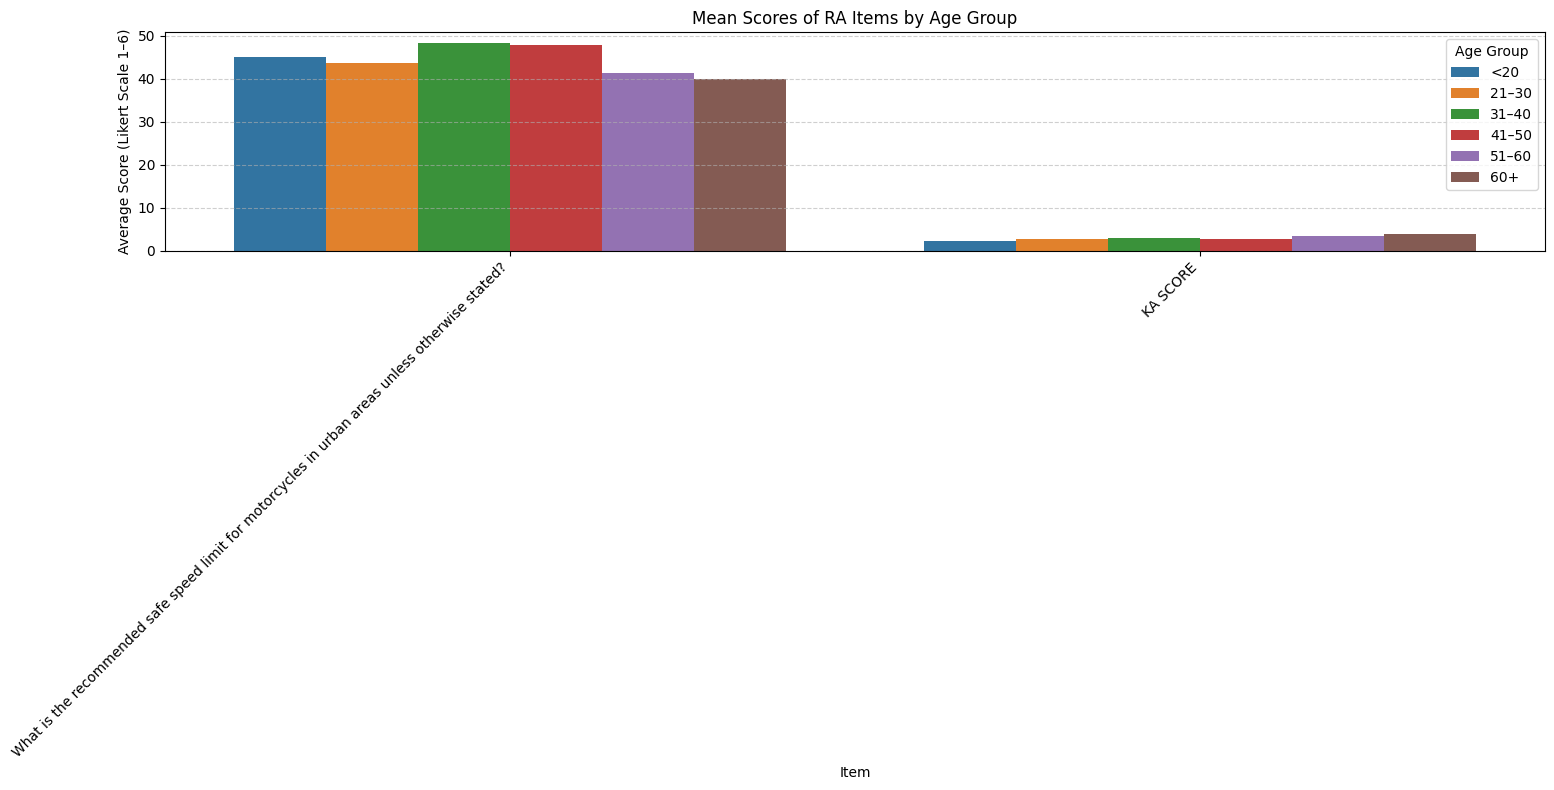

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# === Load Excel File ===
file_path = "file.xlsx"  # Replace with your actual file path

# Load demographic and RA data
non_occu_demo = pd.read_excel(file_path, sheet_name='NON-OCCU DEMOGRAPHIC', usecols="A,D,E,F,H,L,M")
occu_demo = pd.read_excel(file_path, sheet_name='OCCU DEMOGRAPHIC', usecols="A,D,E,I,K,M,P,Q")
non_occu_ra = pd.read_excel(file_path, sheet_name='NON-OCCU RA')
occu_ra = pd.read_excel(file_path, sheet_name='OCCU RA')

respondent_id_col = non_occu_demo.columns[0]

# Ensure respondent ID exists in RA data
if respondent_id_col not in non_occu_ra.columns:
    non_occu_ra.insert(0, respondent_id_col, non_occu_demo[respondent_id_col])
if respondent_id_col not in occu_ra.columns:
    occu_ra.insert(0, respondent_id_col, occu_demo[respondent_id_col])

# Clean RA columns: Drop any column with "Unnamed" in name
non_occu_ra = non_occu_ra.loc[:, ~non_occu_ra.columns.str.contains("Unnamed", case=False)]
occu_ra = occu_ra.loc[:, ~occu_ra.columns.str.contains("Unnamed", case=False)]

# Merge
non_occu_merged = pd.merge(non_occu_demo, non_occu_ra, on=respondent_id_col)
occu_merged = pd.merge(occu_demo, occu_ra, on=respondent_id_col)
non_occu_merged['Group'] = 'Non-Occupational Riders'
occu_merged['Group'] = 'Occupational Riders'
combined_df = pd.concat([non_occu_merged, occu_merged], ignore_index=True)

# Age Grouping
combined_df['Age'] = pd.to_numeric(combined_df['Age'], errors='coerce')
combined_df = combined_df.dropna(subset=['Age'])
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['<20', '21–30', '31–40', '41–50', '51–60', '60+']
combined_df['Age Group'] = pd.cut(combined_df['Age'], bins=bins, labels=labels, right=False)

# Identify RA item columns (drop demographic and ID columns)
demo_cols = list(non_occu_demo.columns) + list(occu_demo.columns) + ['Group', 'Age Group']
ra_cols = [col for col in combined_df.columns if col not in demo_cols and pd.api.types.is_numeric_dtype(combined_df[col])]

# Function to compute cleaned grouped stats
def compute_grouped_stats(df, group_vars, ra_cols):
    results = []
    for name, group in df.groupby(group_vars):
        stat = group[ra_cols].agg(['mean', 'median', 'std', 'var']).T
        stat.columns = ['Mean', 'Median', 'Std Dev', 'Variance']
        stat = stat.reset_index().rename(columns={'index': 'Item'})
        for key, value in zip(group_vars, name if isinstance(name, tuple) else [name]):
            stat[key] = value
        results.append(stat)
    final = pd.concat(results, ignore_index=True)
    return final.dropna(subset=['Mean', 'Median'], how='all')

# Compute grouped stats
grouped_stats = compute_grouped_stats(combined_df, ['Group', 'Age Group'], ra_cols)

# Show clean result
print("\n📊 Cleaned Grouped Summary Statistics by Rider Type and Age Group:\n")
print(grouped_stats.round(2))

# Save to Excel
grouped_stats.to_excel("Cleaned_Grouped_RA_Statistics.xlsx", index=False)

# Optional Visualization
plt.figure(figsize=(16, 8))
sns.barplot(data=grouped_stats, x="Item", y="Mean", hue="Age Group", ci=None)
plt.title("Mean Scores of RA Items by Age Group")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Average Score (Likert Scale 1–6)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


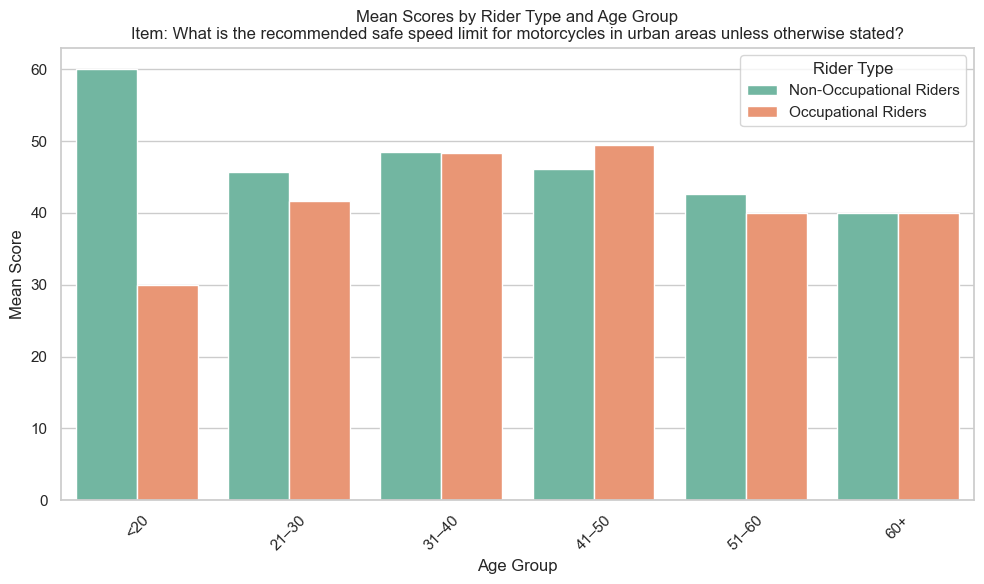

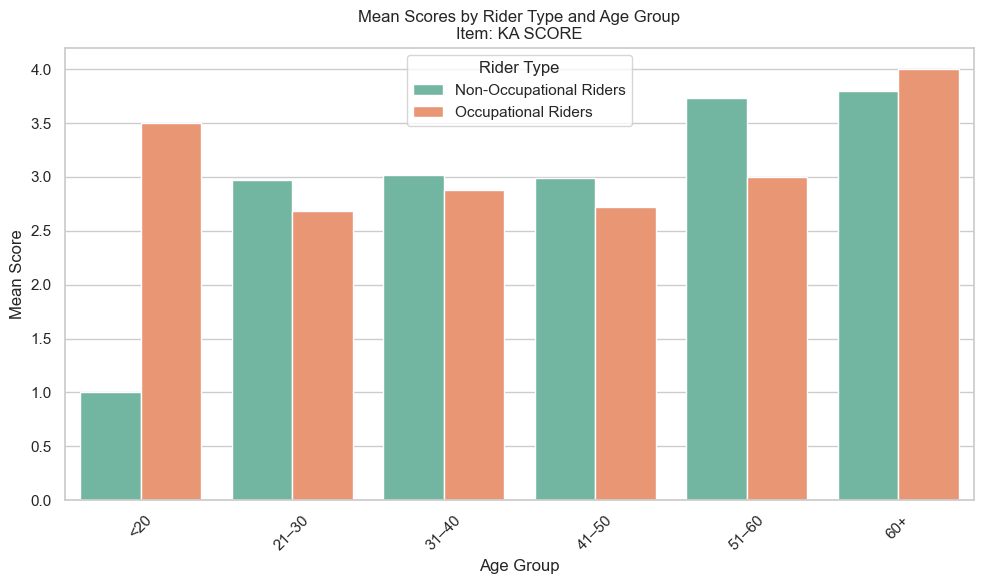

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from Excel
excel_path = "Cleaned_Grouped_RA_Statistics.xlsx"  # Replace with your file name
df = pd.read_excel(excel_path)

# Set plot style
sns.set(style="whitegrid")

# Iterate through each unique item
for item in df["Item"].dropna().unique():
    item_data = df[df["Item"] == item]

    # Skip if all Mean values are NaN
    if item_data["Mean"].isnull().all():
        continue

    # Create bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=item_data,
        x="Age Group",
        y="Mean",
        hue="Group",
        palette="Set2"
    )
    plt.title(f"Mean Scores by Rider Type and Age Group\nItem: {item}", fontsize=12)
    plt.ylabel("Mean Score")
    plt.xlabel("Age Group")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.legend(title="Rider Type")
    plt.show()  # Display the plot


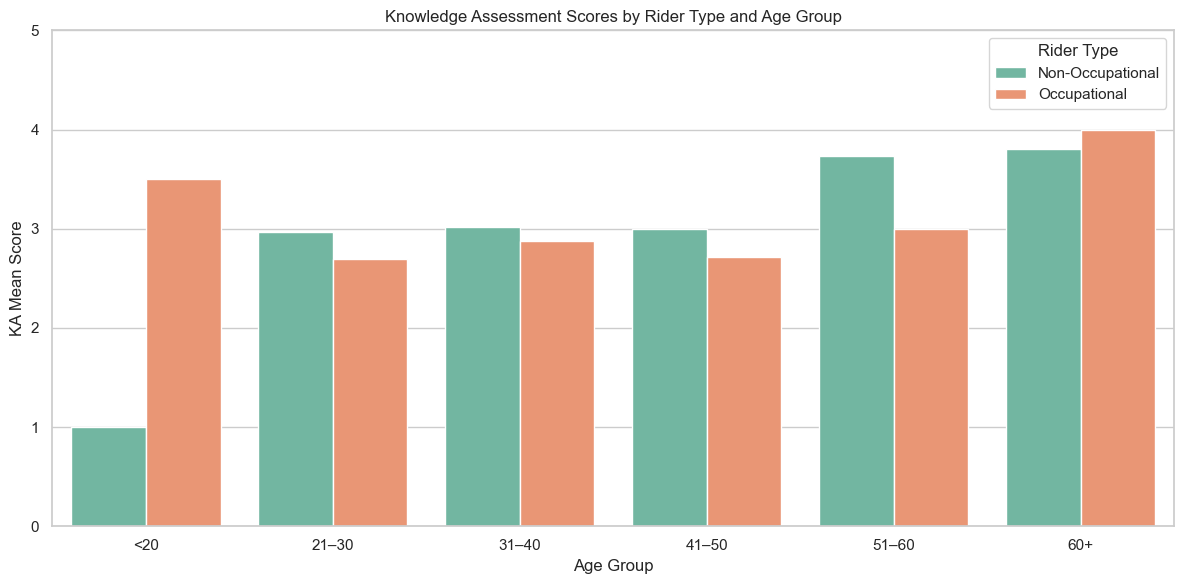

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data based on the summary
data = {
    "Rider Type": [
        "Non-Occupational", "Non-Occupational", "Non-Occupational", "Non-Occupational", "Non-Occupational", "Non-Occupational",
        "Occupational", "Occupational", "Occupational", "Occupational", "Occupational", "Occupational"
    ],
    "Age Group": [
        "<20", "21–30", "31–40", "41–50", "51–60", "60+",
        "<20", "21–30", "31–40", "41–50", "51–60", "60+"
    ],
    "KA Mean": [1.00, 2.97, 3.02, 3.00, 3.73, 3.80, 3.50, 2.69, 2.88, 2.72, 3.00, 4.00],
    "KA Std Dev": [None, 0.88, 0.73, 0.92, 0.70, 0.45, 0.58, 0.93, 0.84, 0.88, 0.71, None]
}

df = pd.DataFrame(data)

# Set seaborn style
sns.set(style="whitegrid")

# Create a grouped barplot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    data=df,
    x="Age Group",
    y="KA Mean",
    hue="Rider Type",
    palette="Set2"
)
plt.title("Knowledge Assessment Scores by Rider Type and Age Group")
plt.ylabel("KA Mean Score")
plt.xlabel("Age Group")
plt.ylim(0, 5)
plt.legend(title="Rider Type")
plt.tight_layout()
plt.show()


/var/folders/j3/kwprsg3s3_zf9_90gxwcknm00000gn/T/ipykernel_29442/2622850246.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['KA_Score'] = ka_scores
/var/folders/j3/kwprsg3s3_zf9_90gxwcknm00000gn/T/ipykernel_29442/2622850246.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['KA_Score'] = ka_scores


OCCU Demographic vs KA Score

Spearman Correlation Matrix: OCCU
                    Age  Education    Income  Training  License_Years  \
Age            1.000000  -0.075062  0.138563 -0.104956       0.674509   
Education     -0.075062   1.000000 -0.052327  0.086579      -0.144091   
Income         0.138563  -0.052327  1.000000  0.016826       0.057481   
Training      -0.104956   0.086579  0.016826  1.000000      -0.104533   
License_Years  0.674509  -0.144091  0.057481 -0.104533       1.000000   
Violations    -0.038283   0.140157  0.011939  0.086431      -0.085793   
Accidents     -0.014485   0.023920 -0.085871  0.036283      -0.009012   
KA_Score       0.023829  -0.097445  0.052684 -0.196452       0.098191   

               Violations  Accidents  KA_Score  
Age             -0.038283  -0.014485  0.023829  
Education        0.140157   0.023920 -0.097445  
Income           0.011939  -0.085871  0.052684  
Training         0.086431   0.036283 -0.196452  
License_Years   -0.085793  -0.009

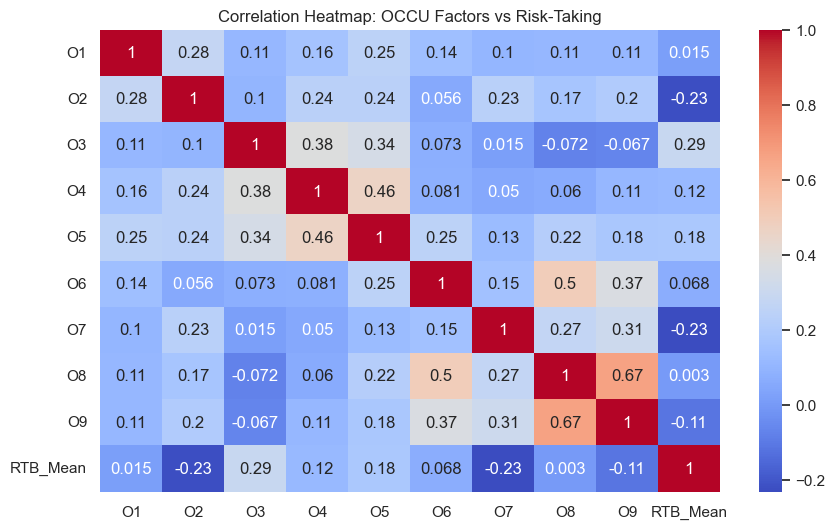


[NON-OCCU] OCCUPATIONAL FACTORS vs MRBQ:

Correlation Between NON-OCCU Factors and Risk-Taking:
                O1        O2        O3        O4        O5        O6  \
O1        1.000000 -0.022349  0.266420  0.144708  0.268724 -0.140689   
O2       -0.022349  1.000000  0.275700  0.226224  0.071144  0.075801   
O3        0.266420  0.275700  1.000000  0.469916  0.210402 -0.059365   
O4        0.144708  0.226224  0.469916  1.000000  0.263062  0.035066   
O5        0.268724  0.071144  0.210402  0.263062  1.000000 -0.006962   
O6       -0.140689  0.075801 -0.059365  0.035066 -0.006962  1.000000   
O7       -0.094938  0.488899  0.339397  0.303466  0.122898  0.075642   
O8       -0.062808  0.404750  0.290715  0.234696  0.094427  0.168198   
RTB_Mean  0.083623 -0.130820 -0.059269 -0.048342  0.124033 -0.185803   

                O7        O8  RTB_Mean  
O1       -0.094938 -0.062808  0.083623  
O2        0.488899  0.404750 -0.130820  
O3        0.339397  0.290715 -0.059269  
O4        0.303466

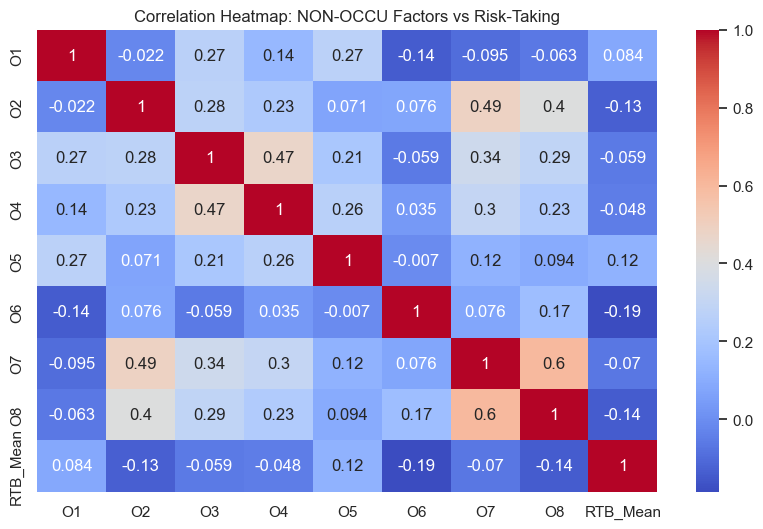

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import spearmanr

# Load Excel Workbook
file_path = 'file.xlsx'  # replace with your actual file path
xl = pd.ExcelFile(file_path)

# Load required sheets
occu_demo = xl.parse('OCCU DEMOGRAPHIC')
nonoccu_demo = xl.parse('NON-OCCU DEMOGRAPHIC')
occu_ra = xl.parse('OCCU RA')
nonoccu_ra = xl.parse('NON-OCCU RA')
occu_mrbq = xl.parse('OCCU MRBQ')
nonoccu_mrbq = xl.parse('NON-OCCU MRBQ')
occu_factors = xl.parse('OCCU Occu Factors')
nonoccu_factors = xl.parse('NON-OCCU Occu Factors')

# Helper to get the correct KA column
def get_ka_column(df):
    for col in df.columns:
        if 'KA' in col.upper():
            return col
    raise ValueError("KA Score column not found. Please check the sheet.")

# Get correct column names for KA Score
occu_ka_column = get_ka_column(occu_ra)
nonoccu_ka_column = get_ka_column(nonoccu_ra)

# =============================
# 1. DEMOGRAPHICS TO KNOWLEDGE
# =============================

def preprocess_demo_ka(df_demo, ka_scores, mapping):
    df = df_demo.iloc[:, mapping]
    df.columns = ['Age', 'Education', 'Income', 'Training', 'License_Years', 'Violations', 'Accidents']
    df['KA_Score'] = ka_scores
    return df.dropna()

# OCCU: A (0), D (3), E (4), I (8), K (10), P (15), Q (16)
occu_data = preprocess_demo_ka(occu_demo, occu_ra[occu_ka_column], [0, 3, 4, 8, 10, 15, 16])
# NON-OCCU: A (0), D (3), E (4), F (5), H (7), L (11), M (12)
nonoccu_data = preprocess_demo_ka(nonoccu_demo, nonoccu_ra[nonoccu_ka_column], [0, 3, 4, 5, 7, 11, 12])

# Encode categorical variables before correlation
def encode_and_correlate(df, label=""):
    df_encoded = df.copy()
    for col in df_encoded.columns:
        if df_encoded[col].dtype == 'object':
            df_encoded[col] = df_encoded[col].astype('category').cat.codes

    print(f"\nSpearman Correlation Matrix: {label}")
    print(df_encoded.corr(method='spearman'))

print("OCCU Demographic vs KA Score")
encode_and_correlate(occu_data, "OCCU")

print("\nNON-OCCU Demographic vs KA Score")
encode_and_correlate(nonoccu_data, "NON-OCCU")

# =========================================
# 2. KNOWLEDGE ASSESSMENT TO RISK-TAKING
# =========================================

def regression_ka_to_rtb(ka_scores, mrbq_df, label=""):
    mrbq_df_cleaned = mrbq_df.dropna()
    y = mrbq_df_cleaned.mean(axis=1)
    x = ka_scores.loc[y.index]
    x = sm.add_constant(x)
    model = sm.OLS(y, x).fit()
    print(f"\nRegression Summary (KA → Risk-Taking) [{label}]:")
    print(model.summary())

print("\n[OCCU] KA Score to MRBQ:")
regression_ka_to_rtb(occu_ra[occu_ka_column], occu_mrbq, "OCCU")

print("\n[NON-OCCU] KA Score to MRBQ:")
regression_ka_to_rtb(nonoccu_ra[nonoccu_ka_column], nonoccu_mrbq, "NON-OCCU")

# ============================================
# 3. OCCUPATIONAL FACTORS TO RISK-TAKING
# ============================================

def analyze_factors_to_rtb(factor_df, mrbq_df, label=""):
    df = factor_df.copy()
    df['RTB_Mean'] = mrbq_df.mean(axis=1)
    df = df.dropna()
    print(f"\nCorrelation Between {label} Factors and Risk-Taking:")
    print(df.corr(method='spearman'))

    plt.figure(figsize=(10, 6))
    sns.heatmap(df.corr(method='spearman'), annot=True, cmap='coolwarm')
    plt.title(f"Correlation Heatmap: {label} Factors vs Risk-Taking")
    plt.show()

print("\n[OCCU] OCCUPATIONAL FACTORS vs MRBQ:")
analyze_factors_to_rtb(occu_factors, occu_mrbq, "OCCU")

print("\n[NON-OCCU] OCCUPATIONAL FACTORS vs MRBQ:")
analyze_factors_to_rtb(nonoccu_factors, nonoccu_mrbq, "NON-OCCU")
